In [57]:
import seaborn as sns
import pandas as pd 
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(10,5)})

# 1- Loading dataset

In [58]:
df = pd.read_csv('dataset.csv', index_col=0)
s = df.shape
print('Le dataset compte {} entrées et {} features'.format(s[0], s[1]))

Le dataset compte 378661 entrées et 14 features


Aperçu des 5 premières lignes puis des 5 dernières du dataset :

In [59]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [60]:
df.tail()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [61]:
df_col = df.columns.tolist()
print('Les 14 variables du dataset sont les suivantes :')
df_col

Les 14 variables du dataset sont les suivantes :


['name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


In [63]:
var_num = ['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']
var_cat = ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']
print(f'Les 6 variables de type numérique sont les suivantes :\n\n{var_num}\n\n')
print(f'Les 8 variables de type objet/catégorie sont les suivantes:\n\n{var_cat}')

Les 6 variables de type numérique sont les suivantes :

['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


Les 8 variables de type objet/catégorie sont les suivantes:

['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']


In [64]:
df_num = df[['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']].copy()
df_cat = df[['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']].copy()
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
goal,378661.0,49080.791521,1.183391e+06,0.01,2000.00,5200.00,16000.00,1.000000e+08
pledged,378661.0,9682.979339,9.563601e+04,0.00,30.00,620.00,4076.00,2.033899e+07
backers,378661.0,105.617476,9.071850e+02,0.00,2.00,12.00,56.00,2.193820e+05
usd pledged,374864.0,7036.728867,7.863975e+04,0.00,16.98,394.72,3034.09,2.033899e+07
usd_pledged_real,378661.0,9058.924074,9.097334e+04,0.00,31.00,624.33,4050.00,2.033899e+07
usd_goal_real,378661.0,45454.401465,1.152950e+06,0.01,2000.00,5500.00,15500.00,1.663614e+08


# 2- Missing and/or duplicated values

In [65]:
duplicated_values = df.duplicated().sum()
print(f'Le dataset comporte {duplicated_values} valeurs dupliquées.')

Le dataset comporte 0 valeurs dupliquées.


In [66]:
df.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Le dataset compte 4 données manquantes dans la variable "name" et 3797 dans la variable "usd pledged".

In [67]:
col_nan = df.columns[df.isnull().any()]
features_nan = {'name', 'usd pledged'}
print(f'Les variables contenant des données manquantes sont les suivantes :\n\n{features_nan}')

Les variables contenant des données manquantes sont les suivantes :

{'usd pledged', 'name'}


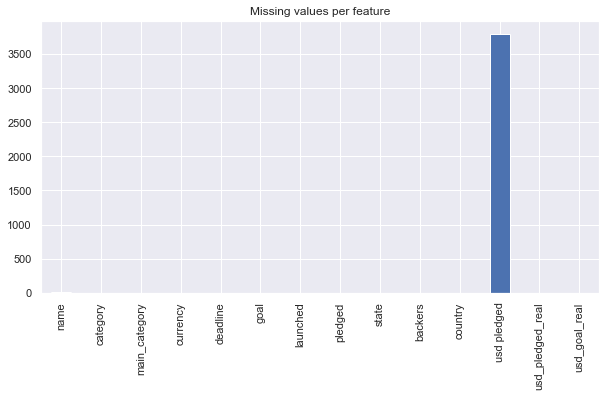

In [68]:
df.isna().sum().plot.bar(title='Missing values per feature', figsize=(10,5))

A priori, la variable "usd pledged" semble contenir un nombre important de données manquantes. Toutefois, comparons ce manque avec la somme totale des données pour voir s'il creuse un écart significatif avec le reste. 

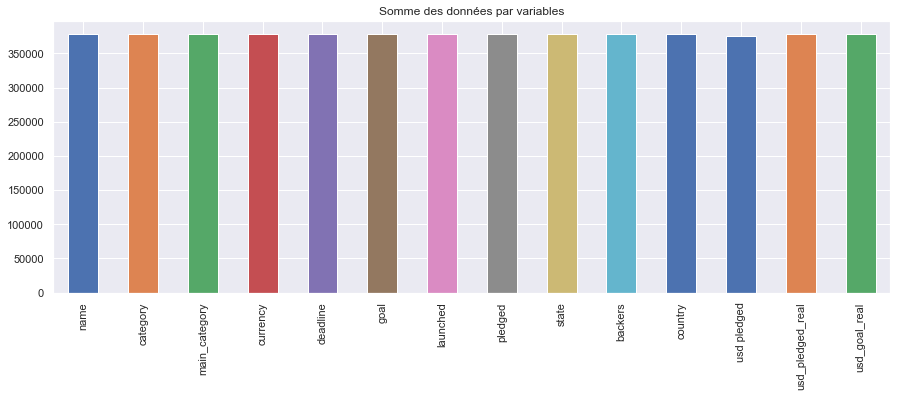

In [69]:
df.count().plot.bar(title='Somme des données par variables', figsize=(15, 5))

Ce graphique nous permet de constater que le nombre de données manquantes dans la variable "usd pledge" est relativement faible en comparaison du nombre total de données. Nous choisirons donc de combler les données manquantes en les remplaçant par la moyenne de l'ensemble des données de cette variable.

In [70]:
df.loc[df['usd pledged'].isnull(),'usd pledged'] = df['usd pledged'].mean()
nan_sum = df['usd pledged'].isnull().sum()
if nan_sum == 0:
    print("La variable ne contient plus de données manquantes.")

La variable ne contient plus de données manquantes.


Concernant les quatre données manquantes dans la variable "name", puisqu'il est impossible de faire une moyenne des noms, et qu'un "mode" reviendrait à créer des doublons de noms de projet, nous remplaçerons ces données manquantes par "unknown".

In [71]:
df.loc[df['name'].isnull(),'name'] = 'unknown'
nan_sum2 = df['name'].isnull().sum()
if nan_sum2 == 0:
    print("La variable ne contient plus de données manquantes.")

La variable ne contient plus de données manquantes.


# 3- Outliers

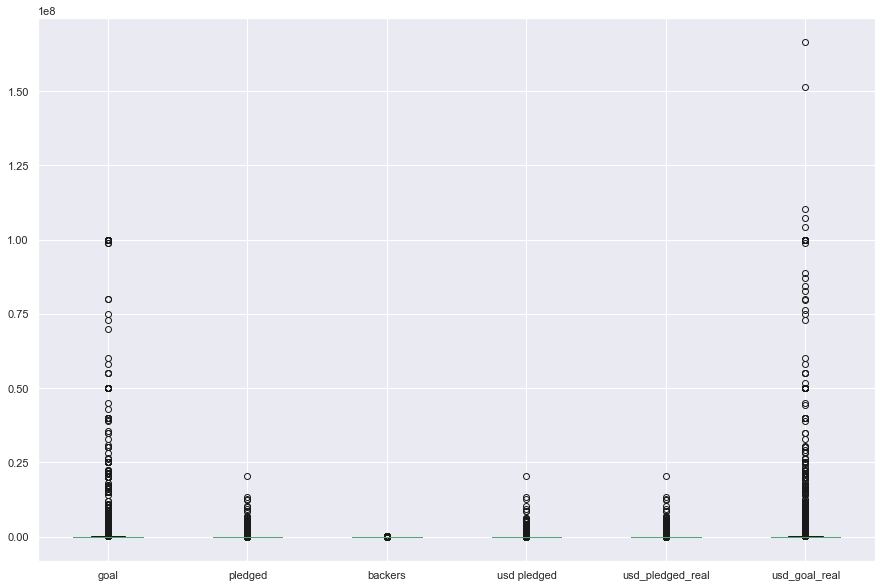

In [72]:
df.boxplot(figsize=(15,10))

Les variables 'goal' et 'usd_goal_real' présentent des outliers assez importants. Regardons cela de plus près.

In [73]:
df.loc[df['usd_goal_real'].idxmax()]

name                FUCK Potato Salad. Paleo Potato Brownies!
category                                                 Food
main_category                                            Food
currency                                                  GBP
deadline                                           2014-08-08
goal                                                  9.9e+07
launched                                  2014-07-09 00:24:34
pledged                                                     0
state                                                  failed
backers                                                     0
country                                                    GB
usd pledged                                                 0
usd_pledged_real                                            0
usd_goal_real                                     1.66361e+08
Name: 1243678698, dtype: object

In [74]:
df.loc[df['goal'].idxmax()]

name                Help me start a fair media company, Trump Media
category                                                      Video
main_category                                            Journalism
currency                                                        USD
deadline                                                 2017-01-21
goal                                                          1e+08
launched                                        2016-11-22 06:41:27
pledged                                                           1
state                                                        failed
backers                                                           1
country                                                          US
usd pledged                                                       0
usd_pledged_real                                                  1
usd_goal_real                                                 1e+08
Name: 1119122774, dtype: object

L'observation des outliers les plus extrêmes nous montre qu'il ne s'agit pas de cas de projets avec un objectif parfaitement irréaliste (cf. un goal de plusieurs centaines de milliards pour un projet qui se présente comme "FUCK Potato Salad. Paleo Potato Brownies!" / un projet de "fair media company" qui s'intitule "Trump Media Video"...).
Nous considérons donc que ces données sortent du cadre raisonnable de notre étude et risquent de biaiser nos résultats. 
Par rapport aux indications du boxplot, nous décidons donc de limiter les entrées des variables 'goal' et 'usd_goal_real' a  


# 4- Univariate analysis

Text(0.5,1,'Frequency by categories')

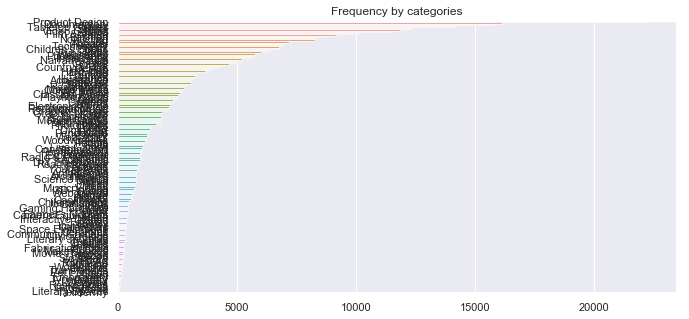

In [75]:
categ_types = df['category'].value_counts()
sns.barplot(categ_types.values, categ_types.index, alpha=0.8).set_title("Frequency by categories")

Nous pouvons constater que le nombre de catégories est immense, à tel point qu'elles sont impossibles à représenter clairement sur un graphique. Intéressons-nous donc plutôt aux catégories principales.

Text(0.5,1,'Frequency by main categories')

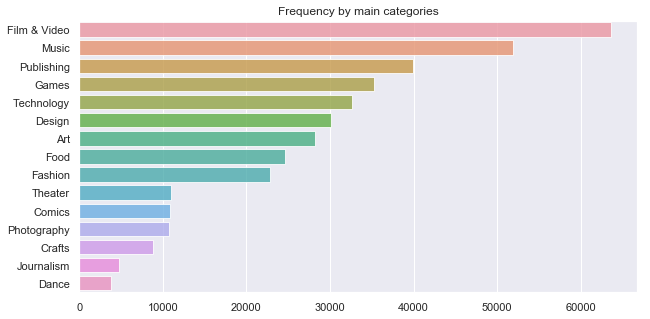

In [76]:
main_categ_types = df['main_category'].value_counts()
sns.barplot(main_categ_types.values, main_categ_types.index, alpha=0.8).set_title("Frequency by main categories")

Il sera plus judicieux de traiter le dataset global à partir des main_categories qui sont beaucoup plus synthétiques. Nous réserverons donc la variable category à de l'analyse très détaillée.'

Text(0.5,1,'Frequency by currency')

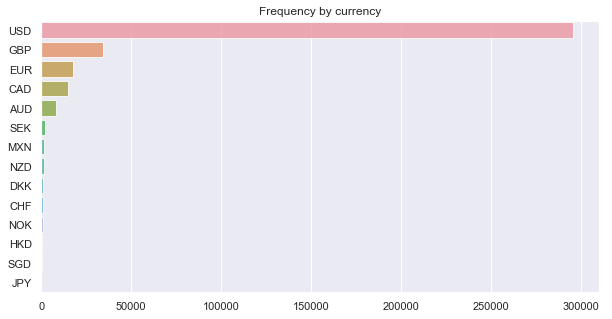

In [77]:
currency_types = df['currency'].value_counts()
sns.barplot(currency_types.values, currency_types.index, alpha=0.8).set_title("Frequency by currency")

Les projets sont dans leur immense majorité financés par le dollar ; viennent ensuite, dans une bien moindre mesure, la livre sterling et l'euro.

Text(0.5,1,'Frequency by countries')

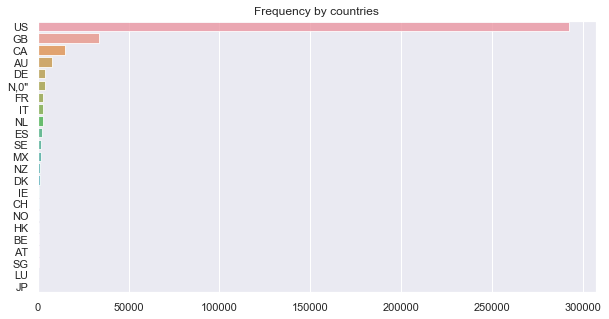

In [78]:
country_types = df['country'].value_counts()
sns.barplot(country_types.values, country_types.index, alpha=0.8).set_title("Frequency by countries")

À nouveau, l'immense majorité des projets prennent leur essor dans le monde anglo-saxon et surtout les Etats-Unis. Le ratio à l'avantage des Etats-Unis est extrêmement marqué.

In [79]:
usa = df[df['country'] == "US"]['country'].count()
print (usa/len(df['country']) * 100, "% des projets Kickstarter proviennent des Etats-Unis.")

77.27941351235009 % des projets Kickstarter proviennent des Etats-Unis.


Text(0.5,1,'State of the project')

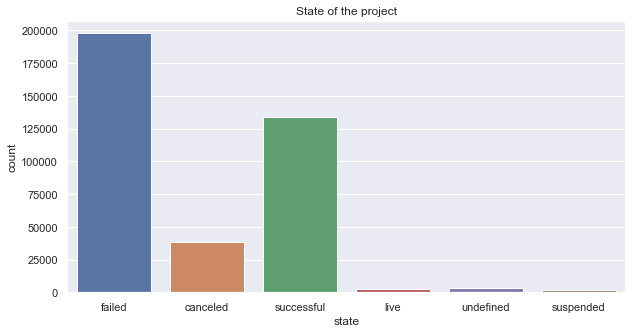

In [80]:
sns.countplot(df['state']).set_title("State of the project")

La grande majorité des projets Kickstarter n'ont pas abouti, mais une part importante a pu être menée à bien. On note toutefois qu'un grand nombre de projets sont annulés en cours de route. Découvrons plus en détail le ratio.

In [81]:
state_ratio = round(df["state"].value_counts() / len(df["state"]) * 100,2)

print("The % for each state category are:\n ")
print(state_ratio)

The % for each state category are:
 
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


In [82]:
deadline_types = df['deadline'].value_counts()
deadline_types

2014-08-08    705
2014-08-10    558
2014-08-07    541
2015-05-01    489
2014-08-09    477
2015-07-01    449
2015-04-01    430
2014-08-15    423
2014-08-31    420
2014-08-14    413
2014-08-20    394
2014-08-13    394
2015-04-30    391
2014-11-01    379
2015-01-01    378
2015-10-01    375
2014-08-16    361
2015-05-31    359
2017-12-01    356
2015-03-01    355
2015-08-01    349
2014-09-12    344
2014-09-07    344
2015-06-01    343
2014-10-31    343
2015-04-03    338
2014-08-11    337
2014-08-17    336
2016-04-01    334
2015-07-31    334
             ... 
2009-05-20      1
2009-09-04      1
2009-09-18      1
2009-07-26      1
2009-09-24      1
2009-09-23      1
2009-11-13      1
2009-08-27      1
2009-07-09      1
2009-08-18      1
2009-07-20      1
2009-08-06      1
2009-08-03      1
2009-05-22      1
2009-10-23      1
2009-06-16      1
2009-08-24      1
2009-05-26      1
2009-08-17      1
2010-02-19      1
2009-09-08      1
2010-01-29      1
2009-06-14      1
2009-09-07      1
2009-12-28

Les deadlines vont du 2009-09-23 au 2014-08-08. On observe une augmentation exponentielle des deadlines à mesure que l'on se rapproche de la date la plus proche, en toute logique.

In [83]:
launch_types = df['launched'].value_counts()
lt_mean = launch_types.mean()
print('En moyenne,', lt_mean , 'projets sont lancés par jour sur Kickstarter')

En moyenne, 1.0015128713080783 projets sont lancés par jour sur Kickstarter


### Partition du dataframe en fonction de l'état d'aboutissement des projets :

Nous séparons le dataframe en trois dataframes distincts, le premier contenant tous les projets qui ont atteint leur goal, le deuxième ceux qui n'y sont pas parvenu, et le dernier compte les projets qui ont été annulés en cours de route. Cela nous permettra de comparer les variables individuellement, mais en fonction de ces trois conditions.

In [84]:
df_success = df[df['state'] == 'successful']
df_failure = df[df['state'] == 'failed']
df_canceled = df[df['state'] == 'canceled']

Voyons d'abord les catégories qui comptent le plus de projets, selon qu'ils aient été au bout du financement, annulé ou qu'ils aient échoué.

Text(0.5,1,'Most successful categories for the completed projects')

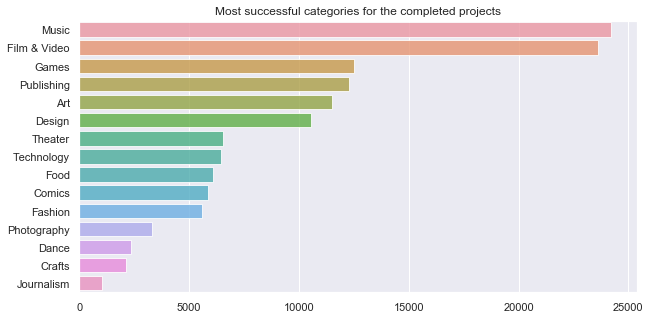

In [85]:
cat_success = df_success['main_category'].value_counts()
sns.barplot(cat_success.values, cat_success.index, alpha=0.8).set_title("Most successful categories for the completed projects")

Text(0.5,1,'Categories with the biggest amount of failed projects')

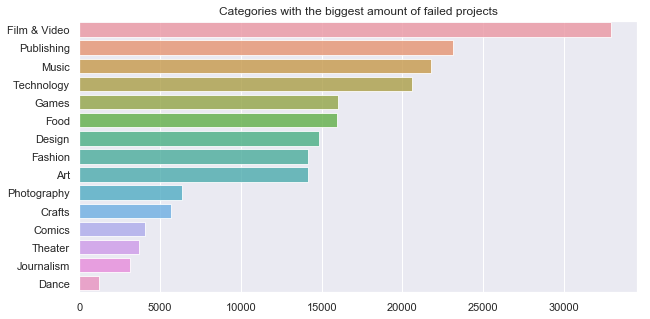

In [86]:
cat_failure = df_failure['main_category'].value_counts()
sns.barplot(cat_failure.values, cat_failure.index, alpha=0.8).set_title("Categories with the biggest amount of failed projects")

Text(0.5,1,'Categories with the biggest amount of canceled projects')

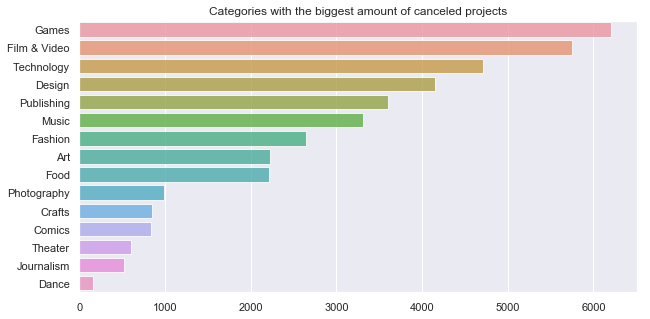

In [87]:
cat_canceled = df_canceled['main_category'].value_counts()
sns.barplot(cat_canceled.values, cat_canceled.index, alpha=0.8).set_title("Categories with the biggest amount of canceled projects")

On constate une certaine symétrie : quel que soit l'état du projet, les variables "Film & Video", "Games", "Music" et "Pusblishing" sont toujours dans le top 5. De la même façon, les variables "Dance", "Comics", "Crafts", "Journalism" appartiennent toujours aux 5 catégories les plus faibles.

# 5- Bivariate analysis

Quelles catégories reçoivent le plus d'investissement financier ?

Text(0.5,1,'USD investments per main category')

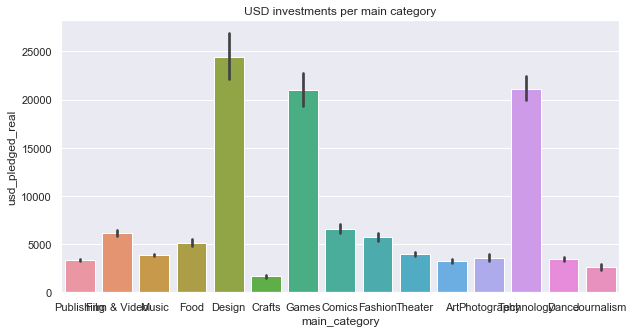

In [ ]:
sns.barplot(data=df, x="main_category", y="usd_pledged_real").set_title('USD investments per main category')

On voit que les domaines qui reçoivent le plus d'investissement financier sont, et de manière sensiblement distincte du reste : le design, les jeux et la technologie. La catégorie qui en reçoit le moins est celle des ateliers manuels. 

Quels sont les goals par catégories principales ?

In [ ]:
sns.barplot(data=df, x="main_category", y="usd_pledged_real").set_title('USD investments per main category')

Quelles catégories attirent le plus de backers ?

In [ ]:
attract_backers = {}

for category in set(df['main_category']):
    backers = df[df['main_category'] == category]['backers'].sum()
    attract_backers[category] = backers

backers = pd.Series(attract_backers)
df2 = df.copy()
df2['backers'] = backers

In [ ]:
df2 = df2.sort_values('backers', ascending=False)
plt.subplots(figsize=(20,5))
sns.set_style("whitegrid")
sns.barplot(df2['backers'].index, y=df2['backers'], palette="Set1", saturation=0.5)
sns.despine(right=True, top=True)

Combien de temps dure une campagne en moyenne ?

In [ ]:
sns.barplot(data=df, x="main_category", y="goal").set_title('Goals per categories')

# CONCLUSION

Je suis sincèrement désolée pour ce rendu incomplet, sans même avoir eu le temps de faire une analyse multi-variée et ce en raison du fait que j'ai été parasitée tout du long par des problèmes émanant de Jupyter Notebook : toutes les 5-10 minutes environ, les cellules cessent de "run", et ce même en relançant le kernel, en relançant Anaconda, et même en redémarrant de multiples fois mon ordinateur. J'ai peut-être pu travailler en tout 1h30 en agrégeant les quelques minutes éparses où Jupyter voulait bien fonctionner. J'ai pu en discuter à la pause de midi avec d'autres personnes, il semblerait que le problème puisse venir du fait que le dataset est énorme, avec plus de 300 000 entrées. Mais je ne sais pas pourquoi mon ordinateur le supporte particulièrement mal. Quoi qu'il en soit, navrée de ce rendu qui ne reflète pas mes capacités. 